# Strogatz Nonlinear Dynamics and Chaos
## Chapter 5: Linear systems
## Jeff Saucerman 12/30/2025

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
#import scipy.optimize

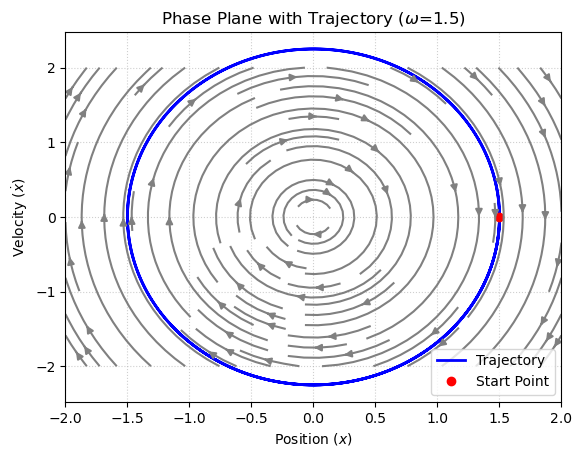

In [2]:
#%% Fig 5.1.2 vector field of harmonic oscillator
def xdot(t, x, omega):
    return np.array([x[1], -omega**2 * x[0]])

# plot one trajectory
omega = 1.5
x0 = [1.5, 0.0]  # initial conditions for x, v
t_span = (0, 10)         
t_eval = np.linspace(0, 10, 500)
sol = scipy.integrate.solve_ivp(xdot, t_span, x0, args=(omega,), t_eval=t_eval)   

# create grid for phase portrait
x_vals = np.linspace(-2, 2, 20)
v_vals = np.linspace(-2, 2, 20)
X, V = np.meshgrid(x_vals, v_vals)
DX, DV = xdot(0, [X, V], omega) # vectorize derivative calculations on the grid

# plotting
plt.plot(sol.y[0], sol.y[1], color='blue', linewidth=2, label='Trajectory')
plt.plot(sol.y[0, 0], sol.y[1, 0], 'ro', label='Start Point') # Mark the start
plt.streamplot(X, V, DX, DV, color='gray')
plt.title(f'Phase Plane with Trajectory ($\omega$={omega})')
plt.xlabel('Position ($x$)')
plt.ylabel('Velocity ($\dot{x}$)')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

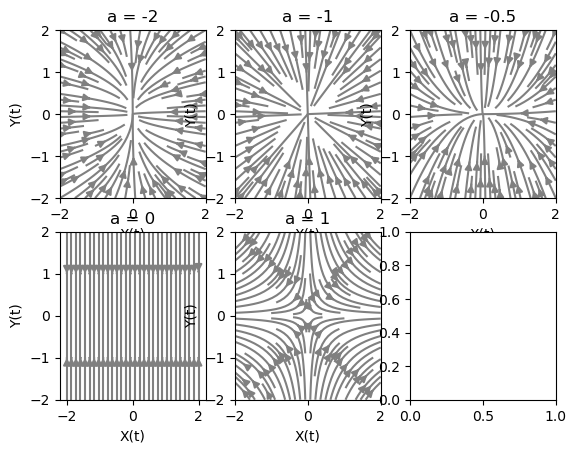

In [3]:
#%% Fig 5.1.5 Phase portraits of uncoupled system
def xdot(t,x,a):
    return np.array([a*x[0], -x[1]])

# create grid for phase portrait
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)

# run phase planes in a loop for different a values: -2, -1, -0.5, 0, 1
a_values = [-2, -1, -0.5, 0, 1]
fig, axes = plt.subplots(2, 3)
axes = axes.flatten()
for i, a in enumerate(a_values):
    ax = axes[i]
    DX, DY = xdot(0, [X, Y], a)
    ax.streamplot(X, Y, DX, DY, color='gray') 
    ax.set_title(f'a = {a}')
    ax.set_xlabel('X(t)')
    ax.set_ylabel('Y(t)')
plt.show


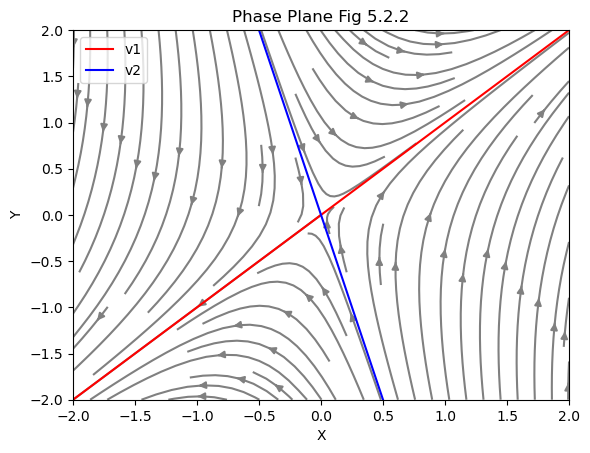

In [4]:
#%% Fig 5.2.2 Phase portraits of saddle node from opposite eigenvalues
# example 5.2.1
def xdot(t,x,A):
    return np.array([A[0,0]*x[0]+A[0,1]*x[1],A[1,0]*x[0]+A[1,1]*x[1]])

# parameters
A = np.array([[1, 1],[4, -2]])

# plot eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(A)
v1 = eigenvectors[:,0]
v2 = eigenvectors[:,1]

# phase plane
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
DX, DY = xdot(0, [X, Y], A) # vectorize derivative calculations on the grid
plt.streamplot(X, Y, DX, DY, color='gray')
plt.plot(x_vals,x_vals*v1[1]/v1[0],label='v1',color='red')
plt.plot(x_vals,x_vals*v2[1]/v2[0],label='v2',color='blue')
plt.xlim([-2, 2])
plt.ylim([-2, 2])
plt.title('Phase Plane Fig 5.2.2')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()


C:\Users\jjs3g\AppData\Local\Temp\ipykernel_7960\3560680410.py:20: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


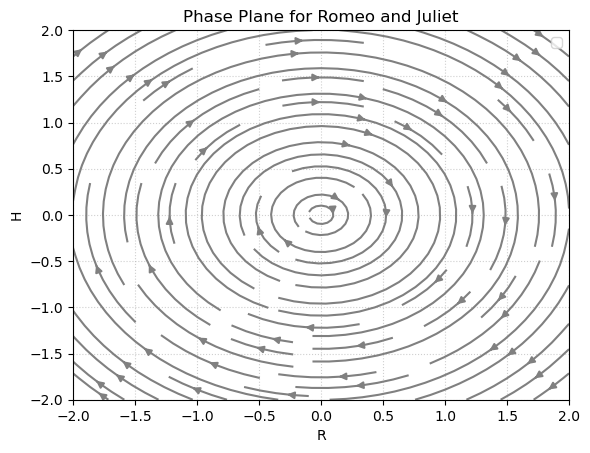

In [5]:
#%%  Romeo and Juliet, FIgure 5.3.1
def xdot(t,x,a,b):
    return np.array([a*x[1],-b*x[0]])

# parameters
a = 2 
b = 2

# create grid for phase portrait
x_vals = np.linspace(-2, 2, 20)
y_vals = np.linspace(-2, 2, 20)
X, Y = np.meshgrid(x_vals, y_vals)
DX, DY = xdot(0, [X, Y], a, b) # vectorize derivative calculations on the grid

# plot phase plane
plt.streamplot(X, V, DX, DY, color='gray')
plt.title('Phase Plane for Romeo and Juliet')
plt.xlabel('R')
plt.ylabel('H')
plt.legend()
plt.grid(True, linestyle=':', alpha=0.6)
plt.show()
